In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Structure of this notebook:
1. Load data
2. Data exploration
    - Merge dataframes and summary statistics
    - Distributions of categorical variables
    - Relationships between numerical and bool variables
    - Relationship between categorical variables and skipping behavior
3. Feature engineering
4. Export dataframes prepared for modeling

## Load Data

See the __challenge page__ at this [link](https://www.aicrowd.com/challenges/spotify-sequential-skip-prediction-challenge) and __download__ the mini __dataset__ named "Training_Set_And_Track_Features_Mini (17.2 MB)" under the "Resources" tab.


In [3]:
ts = pd.read_csv("log_mini.csv")
tf = pd.read_csv("tf_mini.csv")

In [4]:
ts.head()

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,t_64f3743c-f624-46bb-a579-0f3f9a07a123,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone


In [4]:
tf.head()

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,t_a540e552-16d4-42f8-a185-232bd650ea7d,109.706673,1950,99.975414,0.458040,0.519497,0.504949,0.399767,7.511880,0.817709,...,4,0.935512,-0.033284,-0.411896,-0.028580,0.349438,0.832467,-0.213871,-0.299464,-0.675907
1,t_67965da0-132b-4b1e-8a69-0ef99b32287c,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,...,3,0.359675,0.145703,-0.850372,0.123860,0.746904,0.371803,-0.420558,-0.213120,-0.525795
2,t_0614ecd3-a7d5-40a1-816e-156d5872a467,160.839996,1951,99.602549,0.812884,0.425890,0.508280,0.491625,8.368670,0.358813,...,4,0.726769,0.021720,-0.743634,0.333247,0.568447,0.411094,-0.187749,-0.387599,-0.433496
3,t_070a63a0-744a-434e-9913-a97b02926a29,175.399994,1951,99.665018,0.396854,0.400934,0.359990,0.552227,5.967346,0.514585,...,4,0.859075,0.039143,-0.267555,-0.051825,0.106173,0.614825,-0.111419,-0.265953,-0.542753
4,t_d6990e17-9c31-4b01-8559-47d9ce476df1,369.600006,1951,99.991764,0.728831,0.371328,0.335115,0.483044,5.802681,0.721442,...,4,0.562343,0.131931,-0.292523,-0.174819,-0.034422,0.717229,-0.016239,-0.392694,-0.455496


In [5]:
ts.shape, tf.shape

((167880, 21), (50704, 30))

In [3]:
# Check for duplicates
sum(ts.duplicated()), sum(tf.duplicated())

(0, 0)

In [8]:
# Check for NA values
ts.isna().sum(), tf.isna().sum()

(session_id                         0
 session_position                   0
 session_length                     0
 track_id_clean                     0
 skip_1                             0
 skip_2                             0
 skip_3                             0
 not_skipped                        0
 context_switch                     0
 no_pause_before_play               0
 short_pause_before_play            0
 long_pause_before_play             0
 hist_user_behavior_n_seekfwd       0
 hist_user_behavior_n_seekback      0
 hist_user_behavior_is_shuffle      0
 hour_of_day                        0
 date                               0
 premium                            0
 context_type                       0
 hist_user_behavior_reason_start    0
 hist_user_behavior_reason_end      0
 dtype: int64,
 track_id                  0
 duration                  0
 release_year              0
 us_popularity_estimate    0
 acousticness              0
 beat_strength             0
 bounciness  

## Data Exploration

### Merge dataframes  & summary statistics

In [9]:
# Make sure track_id_clean and track_id have the same unique values to be used as the "key" column for merging
len(ts["track_id_clean"].unique()), len(tf["track_id"].unique())

(50704, 50704)

In [4]:
# Merge two dataframes
merged = pd.merge(ts, tf, left_on='track_id_clean', right_on='track_id', how='outer')
merged.head()

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,...,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826
1,0_00079a23-1600-486a-91bd-5208be0c745a,7,12,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,True,False,0,0,...,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826
2,0_012b0fb4-0cc3-429f-9a78-cc6e622153fb,6,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,...,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826
3,0_013cc010-c476-4ad2-8972-73449e0b2ef4,9,13,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,1,...,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826
4,0_01a5f0dc-9938-48c9-92f1-c7e51f34d290,7,12,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,True,False,0,0,...,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826


In [15]:
merged.shape

(167880, 51)

In [12]:
merged.describe()

,session_position,session_length,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hour_of_day,duration,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
count,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,...,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000
mean,9.325911,17.651823,0.040904,0.767602,0.146635,0.172832,0.038909,0.046259,14.193084,215.893484,...,3.948916,0.459283,-0.516251,0.268847,0.206278,-0.016393,-0.139975,0.047940,-0.283057,0.059859
std,5.457638,3.422025,0.198069,0.422363,0.353742,0.378103,0.367295,0.606558,5.996243,60.223626,...,0.336965,0.229190,0.385527,0.193834,0.165442,0.266361,0.313722,0.116279,0.301132,0.261958
min,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.013330,...,0.000000,0.000000,-1.122792,-1.084360,-0.752231,-0.809136,-1.029858,-0.942461,-0.736395,-0.975647
25%,5.000000,15.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,11.000000,183.503403,...,4.000000,0.280089,-0.841586,0.225853,0.174902,-0.170540,-0.330586,-0.030063,-0.489797,-0.020752
50%,9.000000,20.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,15.000000,212.027023,...,4.000000,0.442400,-0.658701,0.311700,0.235429,0.044054,-0.273355,0.037739,-0.376095,0.143839
75%,14.000000,20.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,19.000000,240.800003,...,4.000000,0.626337,-0.203098,0.374788,0.298177,0.134389,-0.019001,0.139464,-0.180665,0.194377
max,20.000000,20.000000,1.000000,1.000000,1.000000,1.000000,60.000000,151.000000,23.000000,1787.760986,...,5.000000,0.999990,0.932165,0.812837,0.605288,1.074504,0.895769,0.380279,0.966760,1.152213


In [5]:
# View variable type
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167880 entries, 0 to 167879
Data columns (total 51 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   session_id                       167880 non-null  object 
 1   session_position                 167880 non-null  int64  
 2   session_length                   167880 non-null  int64  
 3   track_id_clean                   167880 non-null  object 
 4   skip_1                           167880 non-null  bool   
 5   skip_2                           167880 non-null  bool   
 6   skip_3                           167880 non-null  bool   
 7   not_skipped                      167880 non-null  bool   
 8   context_switch                   167880 non-null  int64  
 9   no_pause_before_play             167880 non-null  int64  
 10  short_pause_before_play          167880 non-null  int64  
 11  long_pause_before_play           167880 non-null  int64  
 12  hi

### Distributions of categorical variables

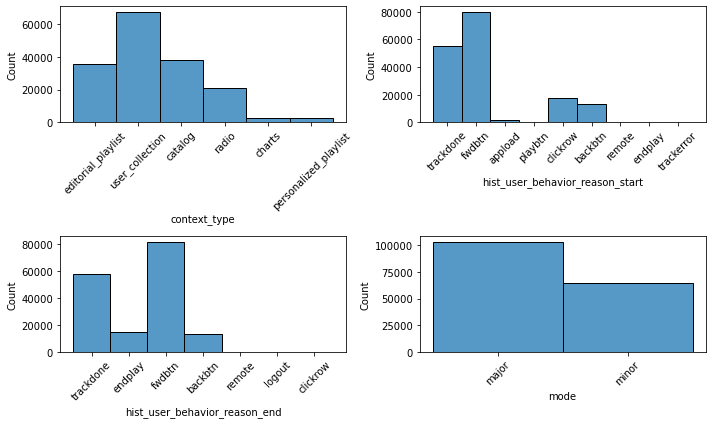

In [39]:
# Check the distributions of categorical variables
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))
sns.histplot(data=merged, x="context_type", ax=axes[0, 0])
axes[0, 0].tick_params(axis='x', rotation=45)
sns.histplot(data=merged, x='hist_user_behavior_reason_start', ax=axes[0, 1])
axes[0, 1].tick_params(axis='x', rotation=45)
sns.histplot(data=merged, x='hist_user_behavior_reason_end', ax=axes[1, 0])
axes[1, 0].tick_params(axis='x', rotation=45)
sns.histplot(data=merged, x="mode", ax=axes[1, 1])
axes[1, 1].tick_params(axis='x', rotation=45)
plt.tight_layout()

### Relationships between numerical/bool variables

<AxesSubplot:>

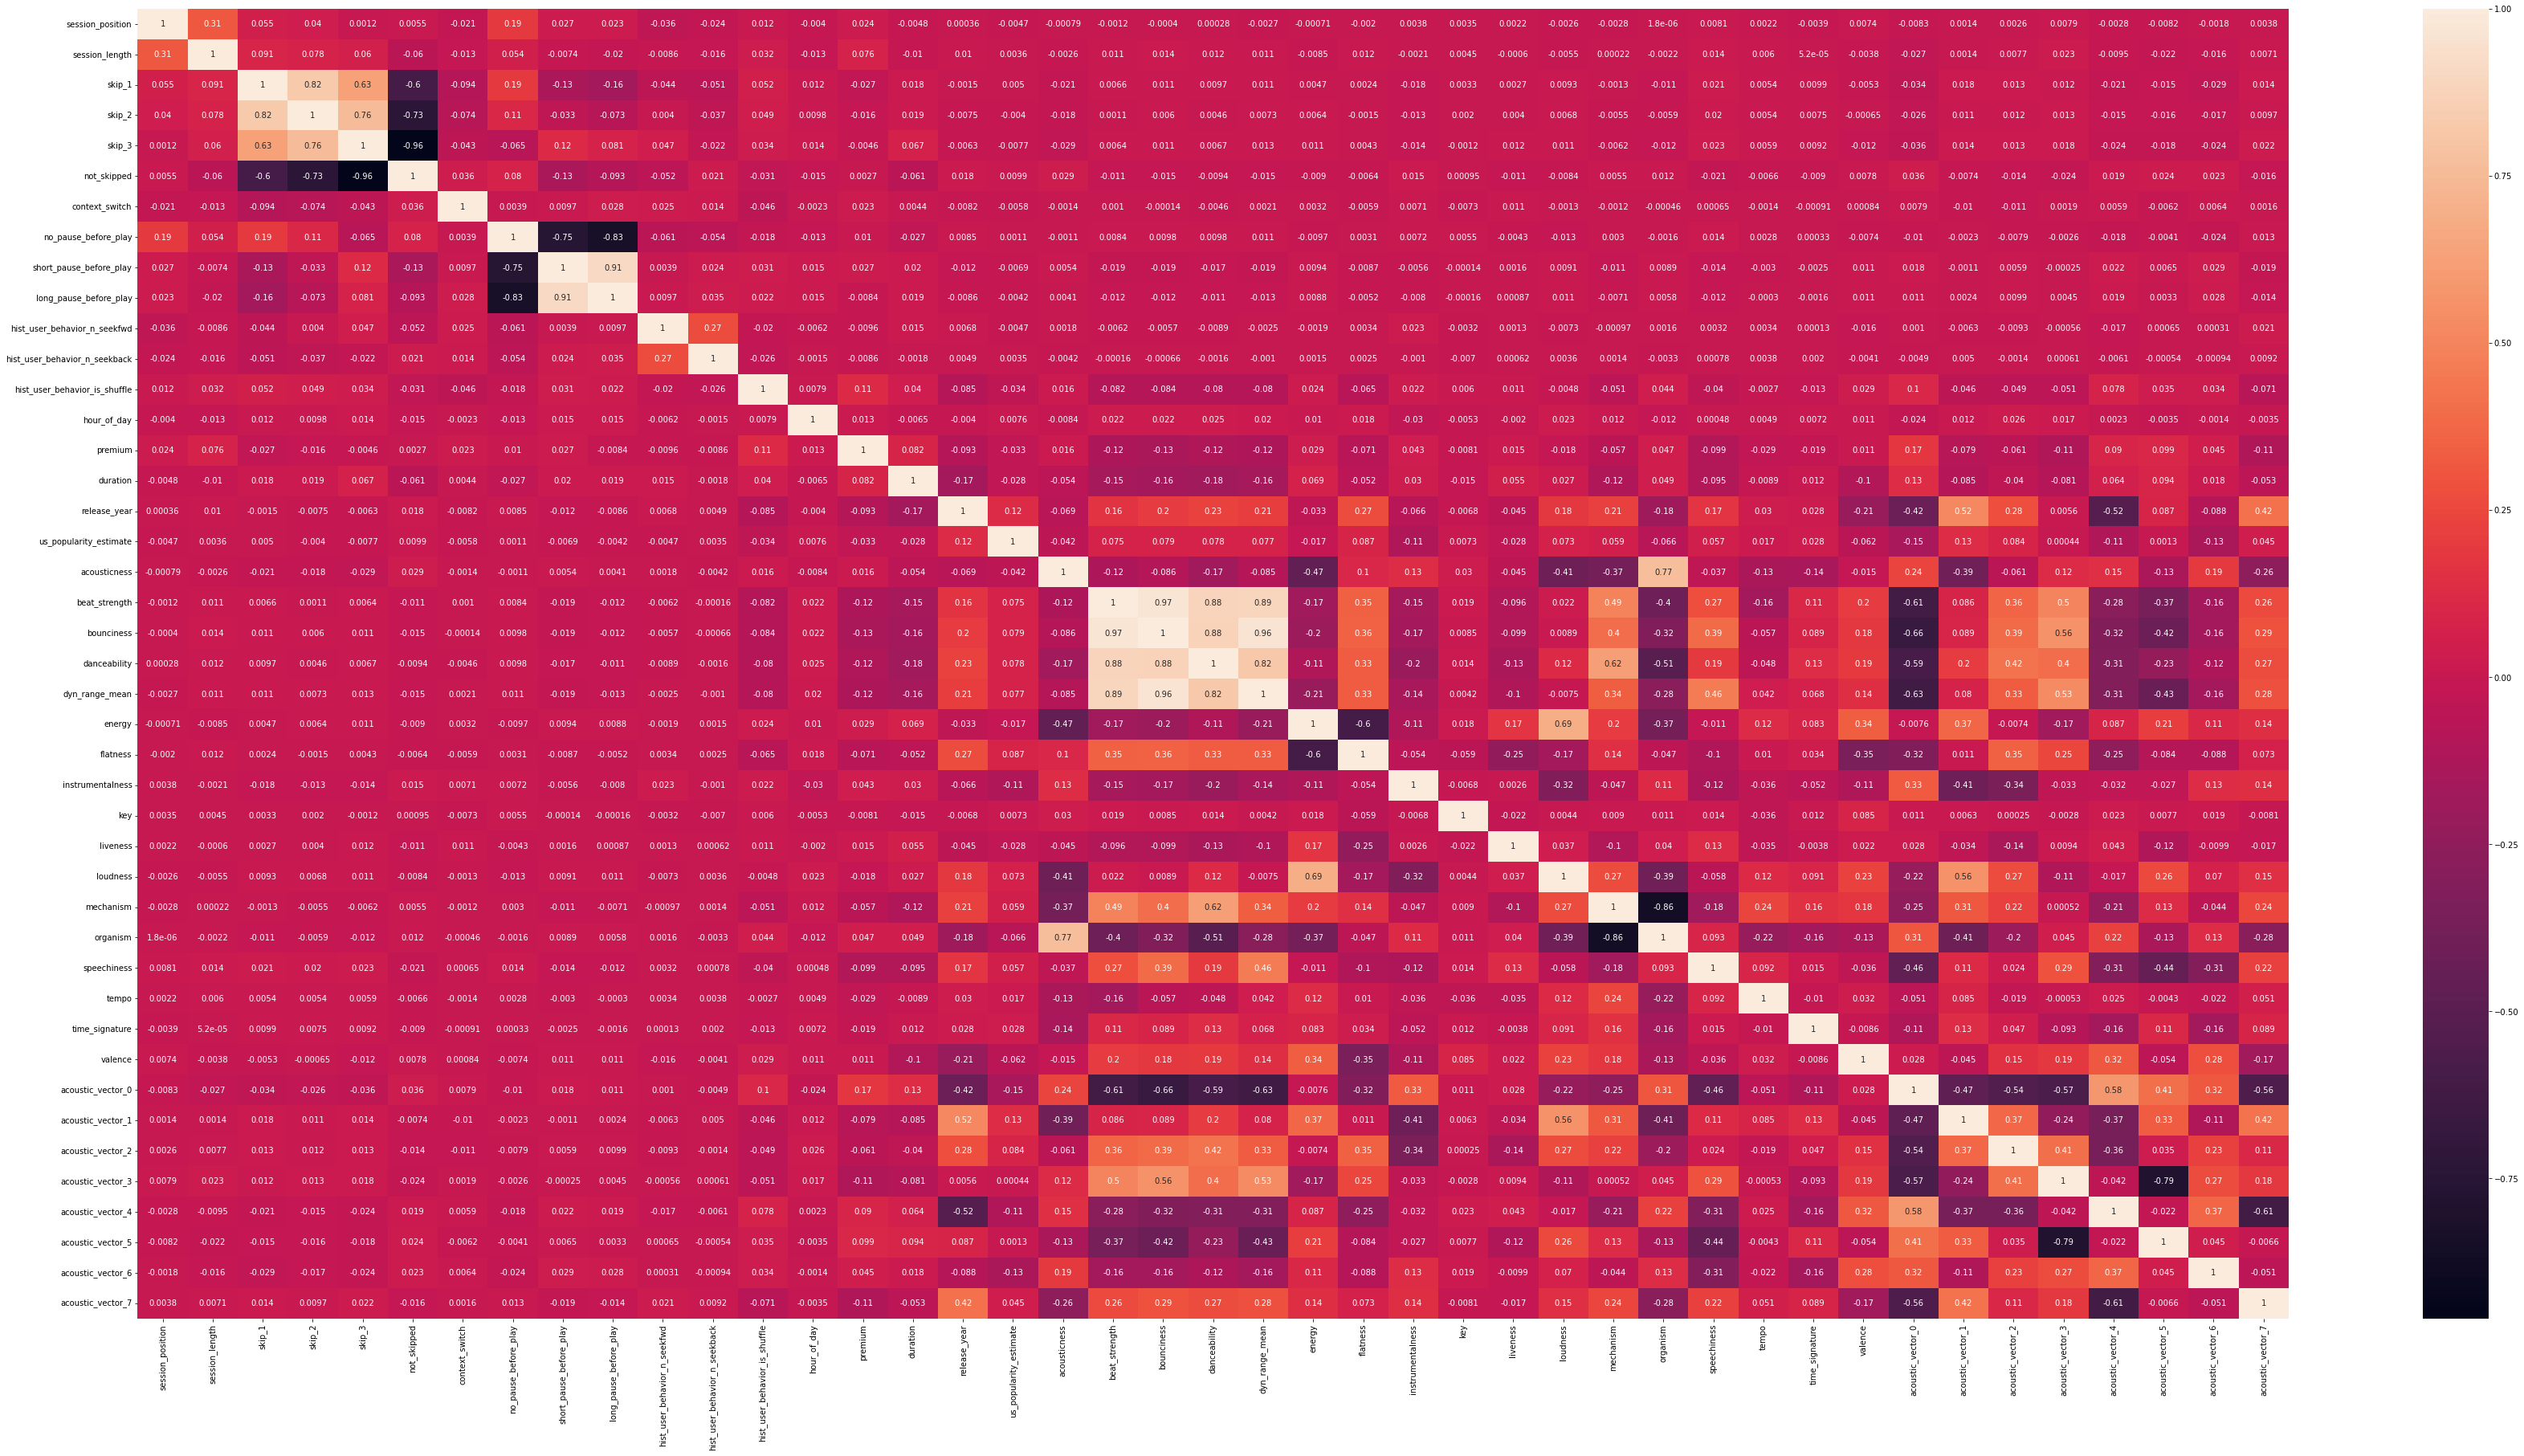

In [21]:
# Heatmap of correlation coefficients for numerical variables and bools
plt.figure(figsize=(60, 30))
sns.heatmap(merged.corr(), annot=True)

High Correlation between pairs "skip_1", "skip_2", "skip_3" and "not_skipped" <br>
#### Question: 
Are skip_1, skip_2, skip_3 explanatory variables or target variables?
#### Fact:
- skip_1, skip_2, skip_3 represent when the song was skipped and are dependent on each other (1 -> track played very briefly, 3 -> most of the track was played)
- If either of skip_1 to _3 is TRUE, not_skipped is F
- If all skip_1 to _3 are FALSE, not_skipped is T

#### It means:
skip_1, skip_2, skip_3 are sufficient to know not_skipped (i.e., If use skip_1, skip_2, skip_3, no need to use other features), so skip_1, skip_2, and skip_3 are not given as explanatory variables but as target variables

#### Resolution: 
Exclude them from X (predictors) and use "not_skipped" as the target variable since we only care about whether the track is skipped

### Relationship between categorical variables and skipping behavior

In [7]:
# Relationship between position of  track in a session and skipping behavior
pos = []
for i in range(len(merged)):
    if (merged.loc[i, "session_position"]/merged.loc[i, "session_length"]) < 1/3:
        pos.append("top")
    elif merged.loc[i, "session_position"]/merged.loc[i, "session_length"] > 2/3:
        pos.append("down")
    else:
        pos.append("middle")
merged["pos"] = pos

In [28]:
# Plotting function 
def plot_bars(col):
# This function plots the proportion of non-skipped songs for each level of a categorical variable
    leng = len(merged[col].unique())
    crosstab = pd.crosstab(merged[col], merged['not_skipped'])
    prop_not_skipped = []
    for i in range(leng):
        prop_not_skipped.append(crosstab.iloc[i][1]/(crosstab.iloc[i][0] + crosstab.iloc[i][1]))
    sns.barplot(x = crosstab.index.tolist(), y = prop_not_skipped)
    plt.xlabel(col)
    plt.ylabel("Prop of NOT skipped")
    plt.ylim(0,1)
    plt.xticks(rotation=45)

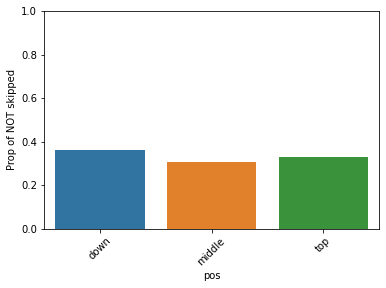

In [29]:
# Position of track in a session and skipping behavior?
plot_bars("pos")

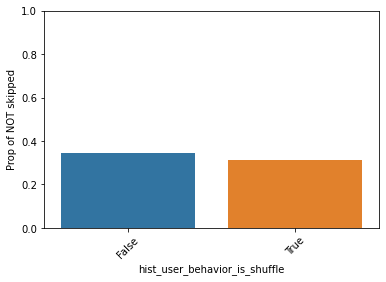

In [30]:
# Shuffle and skip?
plot_bars("hist_user_behavior_is_shuffle")

Text(0, 0.5, 'Prop of NOT Skipped')

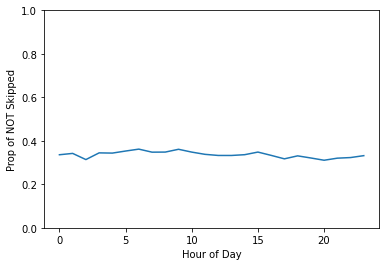

In [31]:
# Hour of day and skip?
cross = pd.crosstab(merged['hour_of_day'], merged['not_skipped'])
y = []
for i in range(24):
    y.append(cross.iloc[i][1]/(cross.iloc[i][0] + cross.iloc[i][1]))
sns.lineplot(x=sorted(merged["hour_of_day"].unique()), y=y)
plt.ylim(0, 1)
plt.xlabel("Hour of Day")
plt.ylabel("Prop of NOT Skipped")

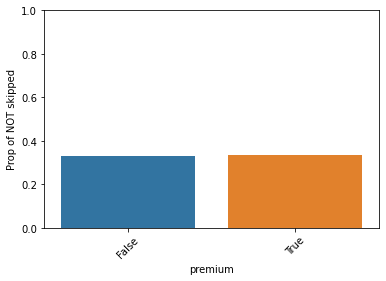

In [32]:
# Premium and skip?
plot_bars("premium")

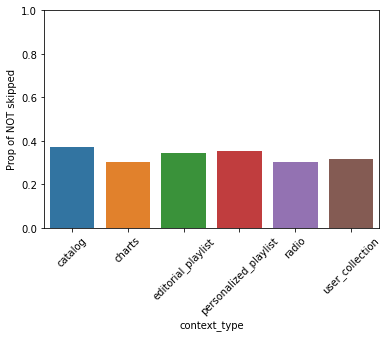

In [33]:
# Context type and skip?
plot_bars("context_type")

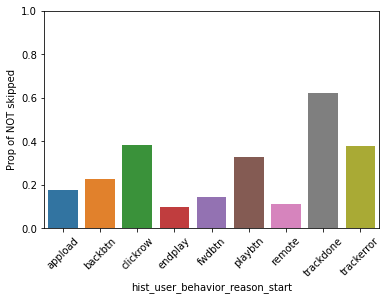

In [34]:
# Reason that the song is played and skipping behavior?
plot_bars("hist_user_behavior_reason_start")

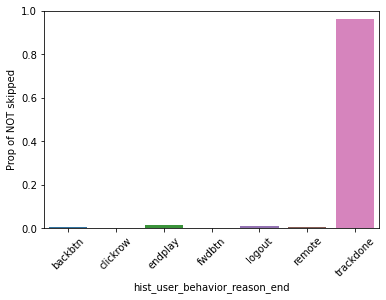

In [35]:
# Reason that the song is ended and skipping behavior?
plot_bars("hist_user_behavior_reason_end")

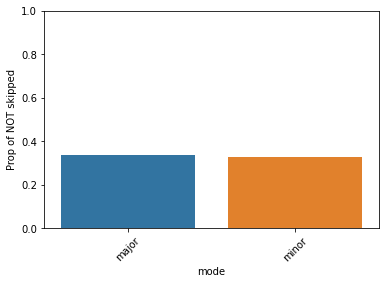

In [36]:
# Mode and skip?
plot_bars("mode")

## Feature Engineering

In [37]:
# Deal with multicategorical variables
# "context_type" and "mode" seemed useless from EDA -> excluded when modeling
# columns_to_drop = ['session_id', 'track_id_clean', 'not_skipped', 'date',  'context_type', 'track_id', 'mode', "skip_1", "skip_2", "skip_3"]

In [38]:
# Convert these two "useful" categorical variables into dummy variables
df_encoded = pd.get_dummies(merged, columns=['hist_user_behavior_reason_start'], drop_first=True)
df_encoded = pd.get_dummies(df_encoded, columns=['hist_user_behavior_reason_end'], drop_first=True)

In [46]:
# df_encoded is the dataframe after dummy encoding
df_encoded.shape, merged.shape

((167880, 64), (167880, 52))

## Export dataframes to be used for modeling

In [37]:
df_encoded.to_csv("merged_dummy.csv")
merged.to_csv("merged.csv")